#Perceptron Tutorial

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

## Limitation of MCP Neuron & Move to Perceptron
Do you remember what we said when we were discussing MCP neurons? They have many limitations like they only can have weights of 1 and -1, they cannot improve by themselves. 

In 1958, the perceptron algorithm was invented by Frank Rosenblatt. Compared with the MCP neurons, the perceptrons includes the improvement below:
1. Input can be any number 
2. Weights can be any number
3. Weights can be trained

The perceptron is a kind of supervised learning in which we tell the program the correct answer for each input value during the training. And perceptron is also an example of the binary classifier, which we can only classify two groups of input through our single-layer perceptron. 

Does it remind you of something from the MCP neuron? Yes! The Threshold! And we only have two categories of data: input above the threshold and input below the threshold.

## Decision Boundary
In order to understand how the perceptron works, it's important to understand what it is Decision boundary. Decision Boundary is the line that separates the inputs into two groups. Let's do draw a decision boundary in a 2-D plane!

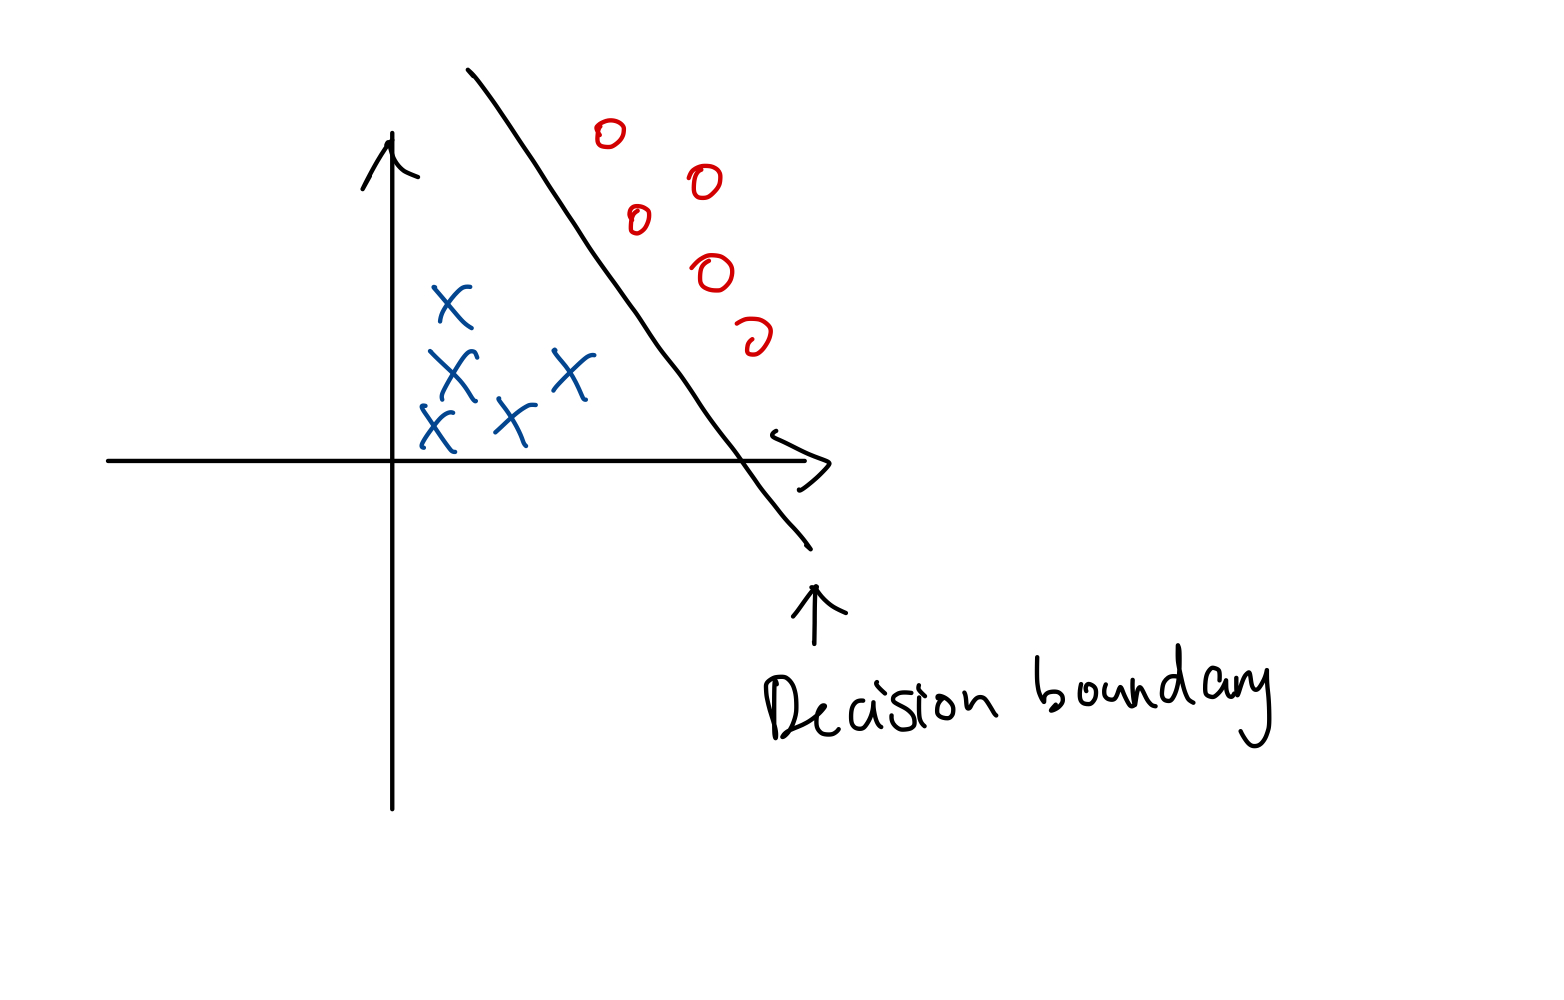

## Threshold & Bias

Do you think it's troublesome to change the threshold by hand when making an MCP neuron? Can you think of a way that makes the threshold fixed, but we can still change the threshold? Here we introduce the Bias into our discussion of perceptrons. We change the threshold($\theta$) into a weighted input with the input of 1 and weight of $-\theta$. Then change the threshold energy of perceptrons into 0. Just as what we did in Graph 1 below:

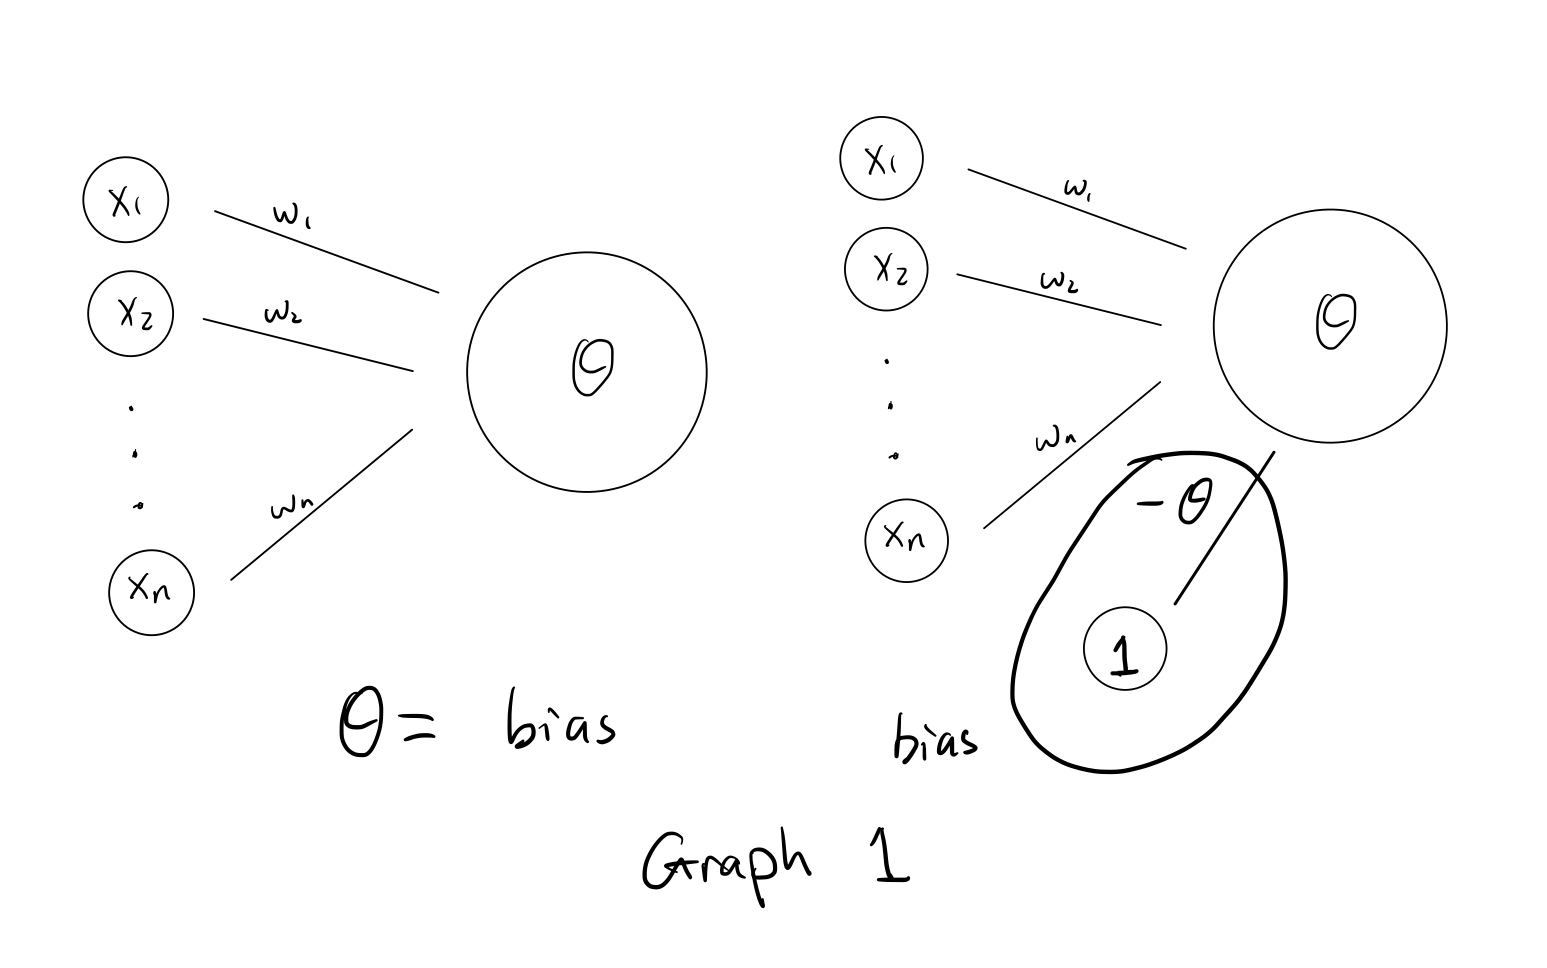

## Activation Function
Do you remember the process of how MCP neurons process inputs? Now we can write them all into a activation function as the graph shows below:

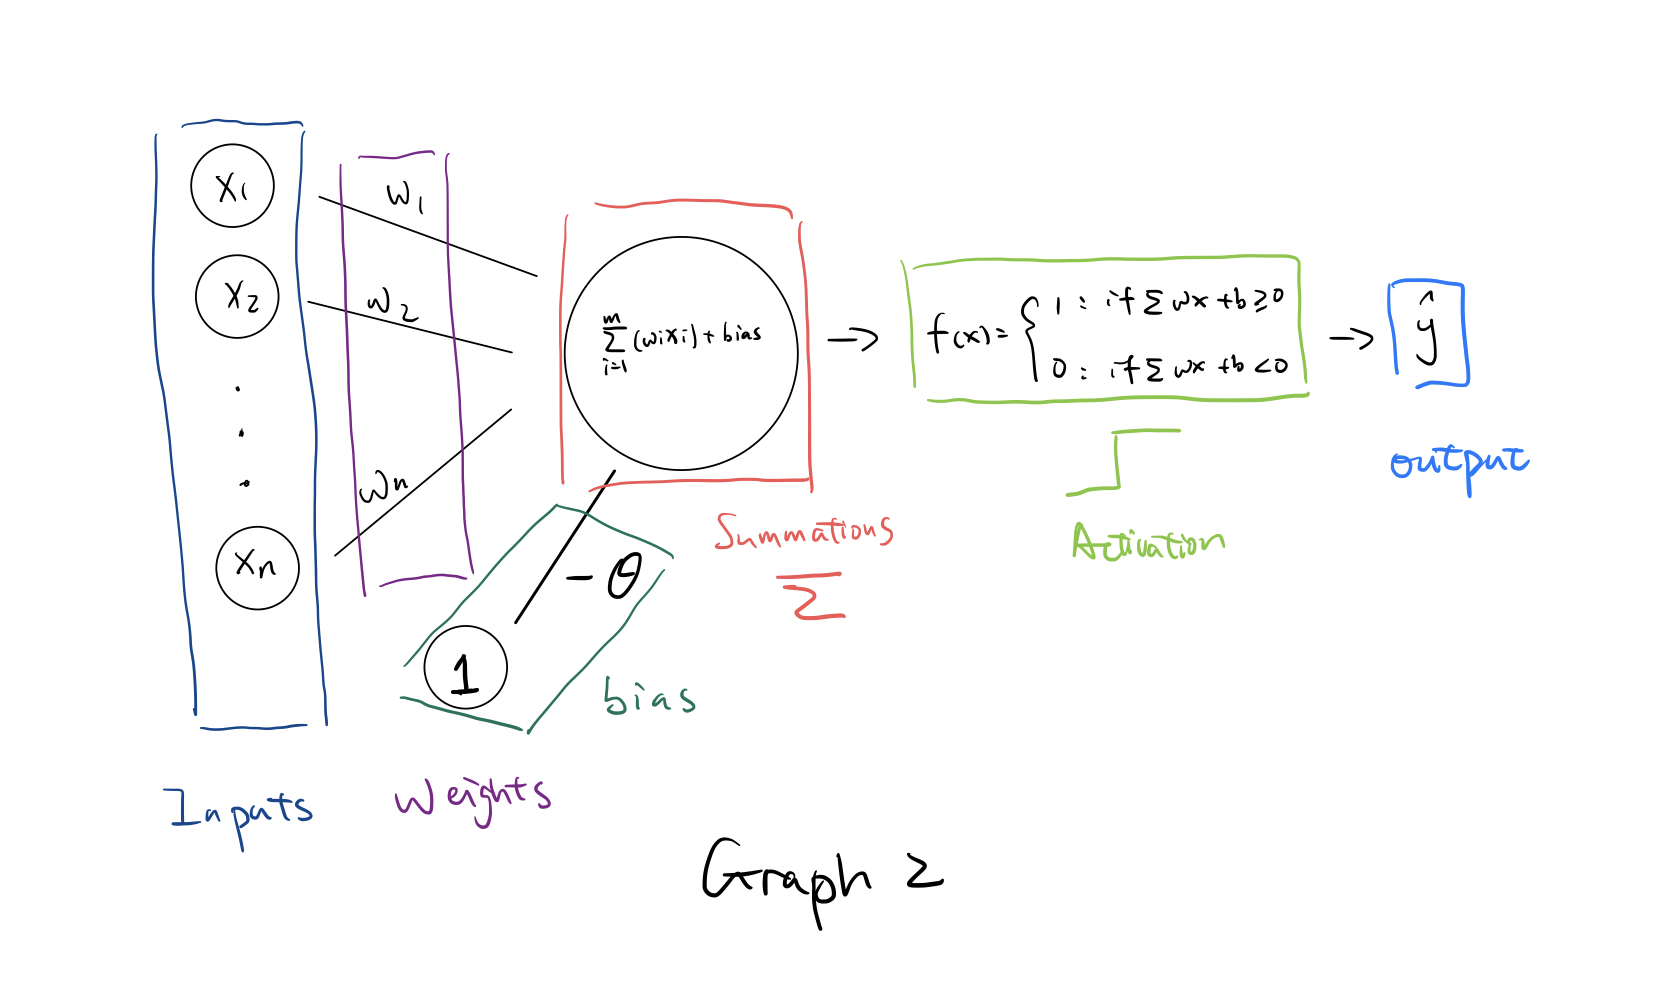

We can write the diagram above in equations: 
$$weights(\bf{w}) = [w_1,w_2,w_3,...,w_n]$$
$$Inputs(\bf{x}) = [x_1,x_2,x_3,...,x_n]$$
Then we can write the summation of all the weighted inputs as: weighted input$=\sum_{1}^{n}{w_ix_i}$

From what we learnt from linear algebra, we can rewrite the weighted input by using the dot product: 

$$\sum_{1}^{n}{w_ix_i} = w \cdot x = w^T x $$

## How to Train the Perceptron?
You may wonder that how the perceptron can learn. The answer is it can learn by changing their weights. The process of adjusting the weights may be confused from the very beginning, but it will be clear in the end. Reminder: we are doing supervised learning, so we are able to compare the result each time.  

Here we introduce sklearn, a python package that can help us generate random data. We use datasets.make_blobs to generate two random cluster of data. Then we can classify them by using our perceptron! 

Check the graph below, where we have two groups of data. 

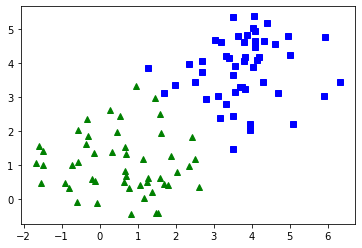

In [ ]:
#We can use sklearn to generate ramdom dataset that can be used for linear seperation 
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(-5, 5))
# Use matplotlib to draw the graph all the data
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [ ]:
#you can use print(X) and print(y) to know what does your data looks like!
#we use print(y) as a sample here
print(y)

[0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1
 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1]


Then we can start with random weights just as the picture below shows: 

(-10.0, 10.0)

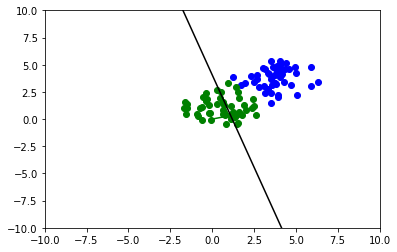

In [ ]:
#First we start with ramdom weights and bias of -1
weights = np.random.rand(2)
bias = -1

# define x axis for plotting
xAxis = np.linspace(-10, 10, 100)
#find where are the datas
a = np.where(y==1)
b = np.where(y==0)
# plot a decision boundary and weight vector
# plot data and decision boundary from weights
plt.scatter(X[a,0], X[a,1], c='b')
plt.scatter(X[b,0], X[b,1], c='g')
boundary = -weights[0]/weights[1]*xAxis - (bias/weights[1])
plt.plot(xAxis, boundary, c='k')
plt.plot([0, weights[0]], [0, weights[1]], c='g')
plt.xlim([-10, 10])
plt.ylim([-10, 10])

You may find that our prediction does not look good. That's true since we are using random weights. We now want to train our perceptron to better predict based on what we have for the weights and threshold!

Look at the plot above; our random prediction that based on the random weight misclassified some of the data points. Now we can introduce $\eta$, the learning rate. 
$$weights(w_{updated}) = w_{originial} + \eta(y_n-\hat y_n)x_n$$
Notes: $\hat y_n$ is the predicted $y_n$

Imagine that we have a wrong prediction, meaning our $\hat y_n \neq y_n$, we will have the situations below:

When our prediction $\hat y_n$ is greater than $y_n$, we should decrease the weight. As a result, $\eta(y_n-\hat y_n)x_n$ should be negative.

When our prediction $\hat y_n$ is smaller than $y_n$, we should increase the weight. As a result, $\eta(y_n-\hat y_n)x_n$ should be postive.

### What is a good learning rate?
Imagine a plot of epoch vs accuracy: 

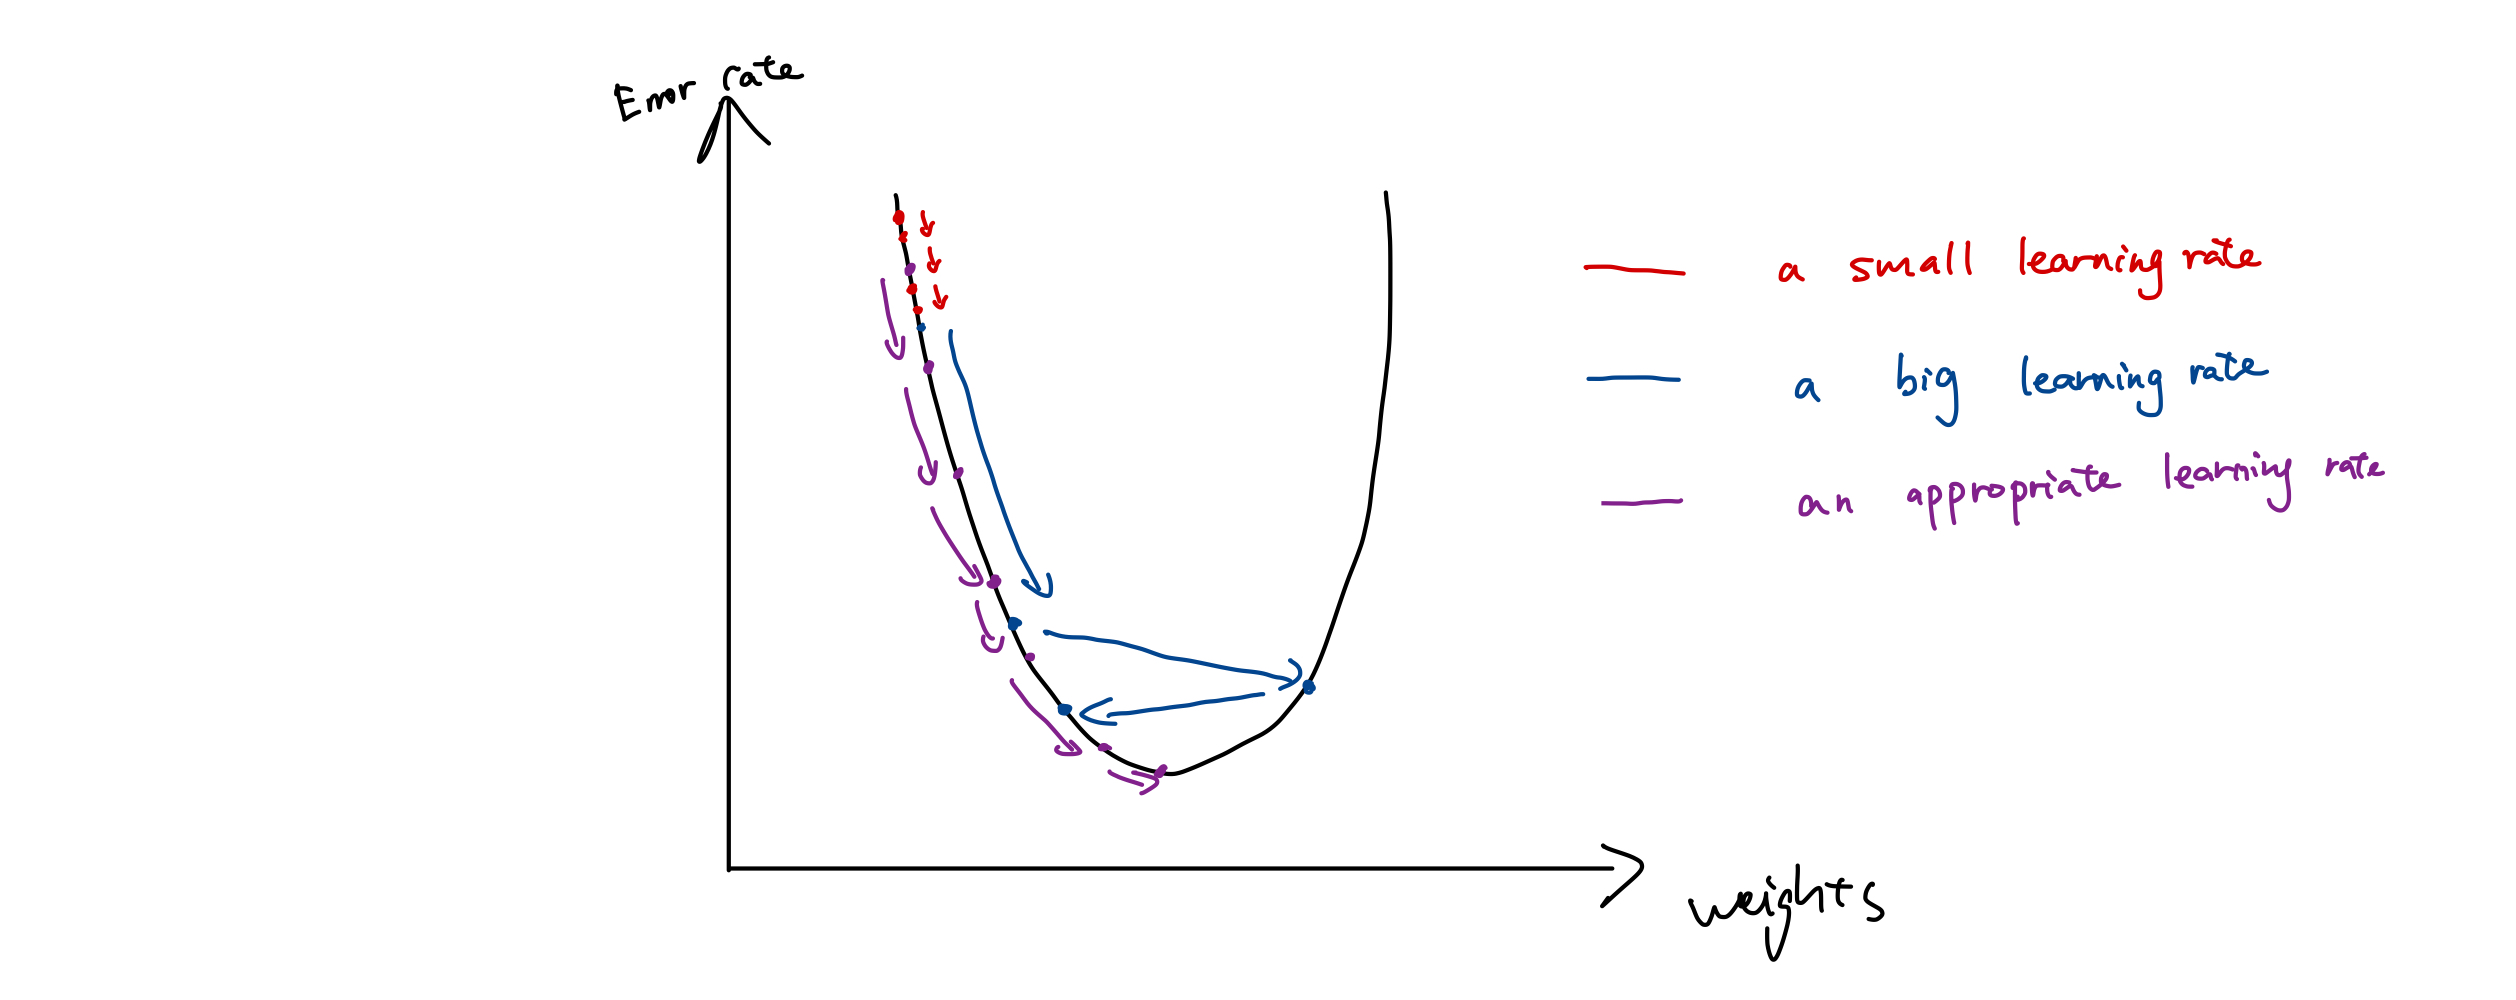

We can see that it's time consuming for a perceptron with small learning rate to get the optimal point; a perceptron with large learning rate may cause the perceptron to bouncing back and forth around the optimal point; and a perceptron with appropriate learning rate may save a lot of time. However, it's difficult to find an approperiate learning rate. As a result, we may set the learning rate to 0.1 and change the learning rate based on the accuracy for each epoch. 

Here is a useful link that explained what the gradient delta rule: https://learnai1.home.blog/2019/11/16/perceptron-delta-rule-python-implementation/

# Perceptron in Python
Can you think of what are the steps that we need to do, and what we have done so far?

1. Initialize the weights and bias;
2. Use the weights to compute the activation and prediction;
3. adjust your weights and get a new prediction;
4. Repeat 2 and 3 for multiple times, until we get the desired result.

We have already done 1 on the block code above, let's do 2 and 3!


Remind we are use the X(input) and y(desired output) that generated by the sklearn.

In [ ]:
# Calculate the activation!
# We have serveral same approach to calculate activation:
def activation1(input, weights, bias):
  #Initialize the activation array
  activation = np.zeros(len(y))
  # enumerate through each row of the input. 
  for i in range(len(y)):
    # dot product
    z = np.dot(input[i,:],weights) + bias
    # sign activation function
    a = np.sign(z)
    activation[i] = a
  return activation 
  
# Function to adjusting weights
def adjust_weights1(input, weights, prediction, y, eta):
  # When our prediction is different from the desired output y:
  for i in range(len(prediction)):
    if (prediction[i] - y[i]) != 0: 
      # we use the function below to change the weights
      deltaW = eta*(y[i] - prediction[i])*input[i,:]
      weights = weights + deltaW
  return weights

Now we want to make our first perceptron based on the functions above. Keep in mind that we are doing a loop that change the weights each time.


Text(0, 0.5, 'Accuracy')

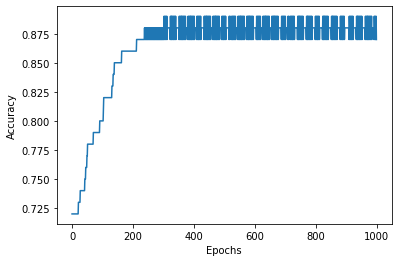

In [ ]:
# Now we combine two functions above to build our first perceptron!
#Step 1: set weights, bias, and our learning rate eta!
weights = np.random.rand(2)
bias = -1
eta = 0.0001

# initialize a variable that will contain the accuracy of each epoch
epochAccuracy = np.zeros(1000)

# loop through each epoch
for epoch in range(len(epochAccuracy)):

  # step2: find the activation 
  activation_ = activation1(X,weights,bias)

  # step2 continued: find the prediction yHat
  # Initialization should be outside the loop
  yHat = np.zeros(len(activation_))
  for i in range(len(activation_)):
    #yHat = np.zeros(len(activation_))
    if activation_[i] > 0: 
      yHat[i] = 1

  correctNum = len(np.where((y - yHat) == 0)[0])
  epochAccuracy[epoch] = correctNum /len(y)
  #step3: adjust the weights!
  weights = adjust_weights1(X, weights, activation_, y, eta)

  
plt.plot(epochAccuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Hmmm interesting, you can see that our accuracy diagram vibrates around certain accuracy. We get this result because we cannot classify every data point of the inputs, and after the perceptron changes its weights, new misclassified data points pop out. Change to a smaller learning rate may help us get a better linear separation line. However, check the graph below, and you may find something interesting.

Now we use matplotlib package in python to draw each linear seperation line that the perceptron get. 

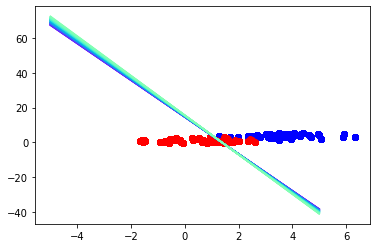

In [ ]:
# Initialize weights 
weights = np.random.rand(2)

# initialize figure (nothing to change in this block)
fig = plt.figure()
plt.ion()
fig.show()
fig.canvas.draw()
#set the x axis
xAxis = np.linspace(-5, 5, 100)
#get colors!
colors = plt.cm.rainbow(np.linspace(0, 1, 100))
cCount = 0
# the activation function! 
z = np.dot(X[i,:],weights)+bias

# use the for loop to update weights and draw the linear separation line
for i in range(X.shape[0]):
  # Get the predicted y
  activation = np.sign(z)
  
  if (activation - y[i]) != 0:
    # update weights
    weights = weights + eta*(y[i]-activation)*X[i,:]
    cCount += 1 

    # plot data and decision boundary from weights
    plt.scatter(X[a,0], X[a,1], c='b')
    plt.scatter(X[b,0], X[b,1], c='r')
    boundary = -weights[0]/weights[1]*xAxis - (bias/weights[1])
    plt.plot(xAxis, boundary, color = colors[cCount])
    fig.canvas.draw()

You can see, we always misclassify some of the points! And all the linear separation lines go through the same point (1,0). The reason behind this fact is we did not change the bias. Hmmm, you may not always trust a perceptron. 

Now we introduce a much more efficient way to find the activation and adjust weights. Here we can rewrite the for loop into a single dot product that we mentioned above in the activation function section. 


In [ ]:
#function for prediction:
def activation2(input, weights, bias):
  #recall the np.dot function to calculate the dot product from last tutorial
  z = np.dot(input, weights) + bias
  # use np.sign to classify the answer into 1, 0, -1
  a = np.sign(z)
  return a

#function for adjusting weights:
def adjust_weights2(input, weights, prediction, y, eta):
  # We can use matrix multiply to find the calculate the delta w
  weights = weights + eta * np.matmul((y-prediction), input)
  return weights

In the graph below, we use the Mean Squared Error to represent our accuracy, not the epoch vs. accuracy graph. Remember that here the less error the perceptron has, the better weights are obtained. 

Text(0, 0.5, 'Mean Squared Error (MSE)')

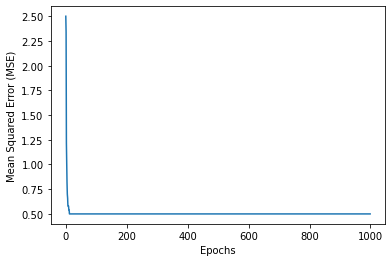

In [ ]:
# Now we combine two functions above to build our first perceptron!
#Step 1: set weights, bias, and our learning rate eta!
weights = np.random.rand(2)
bias = -1
eta = 0.0001

# initialize a variable that will contain the accuracy of each epoch
errorArray = np.zeros(1000)

# loop through each epoch
for epoch in range(len(errorArray)):

  # step2: find the activation 
  activation_ = activation2(X,weights,bias)

  # step2 continued: find the prediction yHat
  yHat = np.zeros(len(activation_))
  for i in range(len(activation_)):
    #yHat = np.zeros(len(activation_))
    if activation_[i] > 0: 
      yHat[i] = 1
    #else:
      #yHat[i] = 0
  #step3: adjust the weights!
  weights = adjust_weights2(X, weights, activation_, y, eta)
  errorArray[epoch] = np.mean((y-activation_)**2)
  
# plot the results!
plt.plot(errorArray)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')

The perceptron is learning succesfully and find the approperate weights! 

# Discussion:
Perceptron is much more useful than the MCP neuron. It can already help us do some simple classifications. 
However, there are some unsolved problems:
1. How can we change bias? 
2. How can we solve non-linear classification problems?
3. How can we classify inputs that have more than two classes?

You can expect more on these questions in the multilayer neuron networks!